In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import coint, adfuller

Data Import 

In [36]:
df_day_2 = pd.read_csv(r"C:\Users\Sky\OneDrive\Desktop\day_-2.csv", delimiter=";") # day -2 
df_day_1 = pd.read_csv(r"C:\Users\Sky\OneDrive\Desktop\day_-1.csv", delimiter=";") # day -1
df_day_0 = pd.read_csv(r"C:\Users\Sky\OneDrive\Desktop\day_0.csv", delimiter=";") # day 0
df_day_1["timestamp"]+= 999900 # edit timestamp
df_day_0["timestamp"]+= 1999500 # edit timestamp
df = pd.concat([df_day_2, df_day_1, df_day_0], ignore_index=True) 
print(df)

       timestamp  buyer  seller     symbol   currency    price  quantity
0              0    NaN     NaN  AMETHYSTS  SEASHELLS   9996.0         1
1              0    NaN     NaN  STARFRUIT  SEASHELLS   5003.0         1
2              0    NaN     NaN  AMETHYSTS  SEASHELLS   9996.0         1
3            100    NaN     NaN  STARFRUIT  SEASHELLS   5004.0         6
4            900    NaN     NaN  STARFRUIT  SEASHELLS   5001.0         2
...          ...    ...     ...        ...        ...      ...       ...
16145    2998300    NaN     NaN  STARFRUIT  SEASHELLS   5050.0         1
16146    2998300    NaN     NaN  AMETHYSTS  SEASHELLS  10002.0         1
16147    2999000    NaN     NaN  AMETHYSTS  SEASHELLS   9995.0         2
16148    2999000    NaN     NaN  STARFRUIT  SEASHELLS   5049.0         2
16149    2999100    NaN     NaN  STARFRUIT  SEASHELLS   5048.0         1

[16150 rows x 7 columns]


AMETHYSTS Data Processing 

In [37]:
amethysts_data = df[df["symbol"] == "AMETHYSTS"]
AMETHYSTS_price = amethysts_data[["timestamp", "price"]]
print(len(AMETHYSTS_price))
print(AMETHYSTS_price)

7235
       timestamp    price
0              0   9996.0
2              0   9996.0
8           1500  10004.0
14          2500   9998.0
16          3200   9996.0
...          ...      ...
16139    2997100  10002.0
16140    2997200  10002.0
16142    2997900  10002.0
16146    2998300  10002.0
16147    2999000   9995.0

[7235 rows x 2 columns]


In [38]:
AMETHYSTS_price.describe()

,timestamp,price
count,7.235000e+03,7235.000000
mean,1.490490e+06,9999.968487
std,8.626831e+05,3.151743
min,0.000000e+00,9995.000000
25%,7.347000e+05,9998.000000
50%,1.487300e+06,9998.000000
75%,2.236400e+06,10002.000000
max,2.999000e+06,10005.000000


STARFRUIT Data Processing 

In [39]:
starfruit_data = df[df["symbol"] == "STARFRUIT"]
STARFRUIT_price = starfruit_data[["timestamp", "price"]]
print(len(STARFRUIT_price))
print(STARFRUIT_price)

8915
       timestamp   price
1              0  5003.0
3            100  5004.0
4            900  5001.0
5           1000  4997.0
6           1100  4997.0
...          ...     ...
16143    2998000  5050.0
16144    2998200  5055.0
16145    2998300  5050.0
16148    2999000  5049.0
16149    2999100  5048.0

[8915 rows x 2 columns]


In [40]:
STARFRUIT_price.describe()

,timestamp,price
count,8.915000e+03,8915.000000
mean,1.486748e+06,5036.637128
std,8.590198e+05,32.042691
min,0.000000e+00,4949.000000
25%,7.296500e+05,5026.000000
50%,1.486400e+06,5047.000000
75%,2.211900e+06,5058.000000
max,2.999100e+06,5094.000000


In [41]:
merged_data = pd.merge(STARFRUIT_price, AMETHYSTS_price, on="timestamp", how="inner")
overlap_length = len(merged_data) # price_x = STARFRUIT, price_y = AMETHYSTS 
overlap_start_time = merged_data["timestamp"].iloc[0]
overlap_end_time = merged_data["timestamp"].iloc[-1]
print(overlap_length)
print(merged_data)
overlap_timestamps = merged_data["timestamp"]
print(overlap_start_time, overlap_end_time)

4237
      timestamp  price_x  price_y
0             0   5003.0   9996.0
1             0   5003.0   9996.0
2          1500   5003.0  10004.0
3          2500   4996.0   9998.0
4          3200   4996.0   9996.0
...         ...      ...      ...
4232    2996200   5053.0  10005.0
4233    2996400   5051.0   9998.0
4234    2996600   5056.0   9996.0
4235    2998300   5050.0  10002.0
4236    2999000   5049.0   9995.0

[4237 rows x 3 columns]
0 2999000


Price of AMETHYSTS

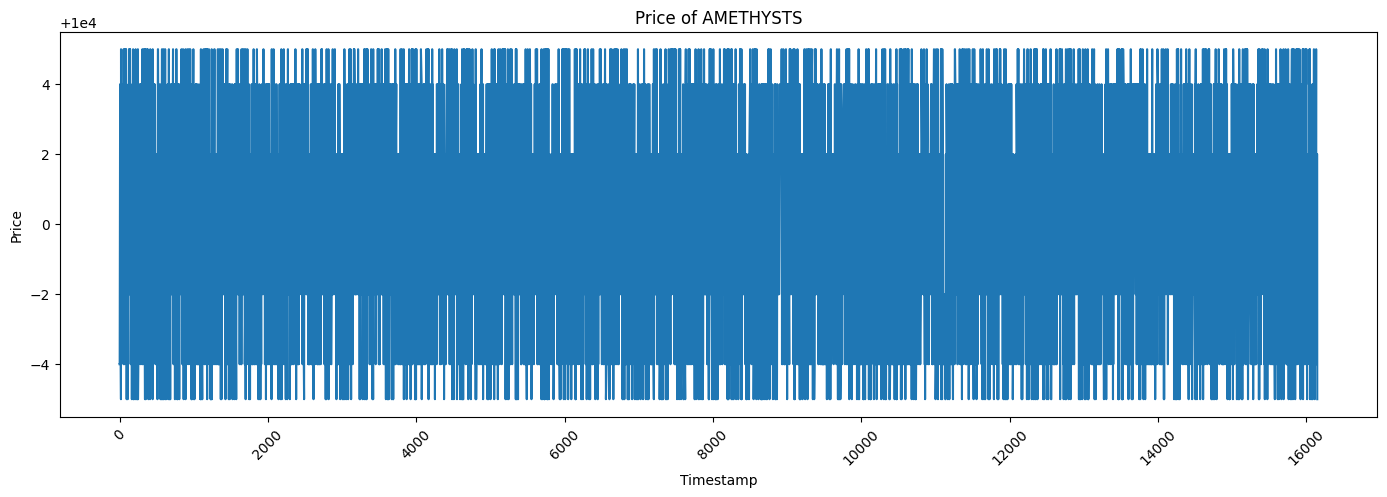

In [42]:
plt.figure(figsize=(17, 5))
# Plot the price
plt.plot(AMETHYSTS_price['price'])
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.title("Price of AMETHYSTS")
plt.xticks(rotation=45)
plt.show()

Price of STARFRUIT

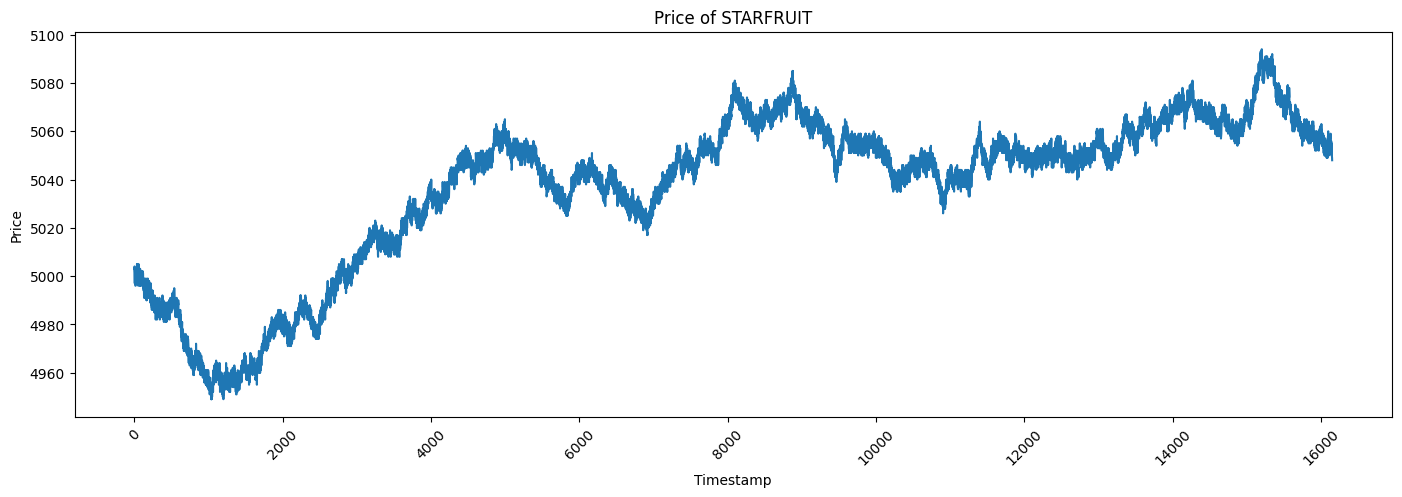

In [43]:
plt.figure(figsize=(17, 5))
# Plot the price
plt.plot(STARFRUIT_price['price'])
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.title("Price of STARFRUIT")
plt.xticks(rotation=45)
plt.show()

Stationary Test 

AMETHYSTS

In [44]:
def printTestData (result):
    print(f'ADF Statistic: {result[0]}')
    print(f'n_lags: {result[1]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}') 
    print("\n")

In [45]:
Amethysts_ADF = adfuller(AMETHYSTS_price['price'], autolag='AIC')
printTestData(Amethysts_ADF)

ADF Statistic: -75.21873559751832
n_lags: 0.0
p-value: 0.0
Critial Values:
   1%, -3.431254288353497
Critial Values:
   5%, -2.8619396248350584
Critial Values:
   10%, -2.5669827161052288




Conclusion: stationary 

In [46]:
Starfruit_ADF = adfuller(STARFRUIT_price['price'], autolag='AIC')
printTestData(Starfruit_ADF)

ADF Statistic: -1.4644671732959695
n_lags: 0.5510100224350771
p-value: 0.5510100224350771
Critial Values:
   1%, -3.4310845520505455
Critial Values:
   5%, -2.8618646239155696
Critial Values:
   10%, -2.5669427923010404




Conclusion: non-stationary 

Trading Strategy Developing 

MA 5 and MA 50

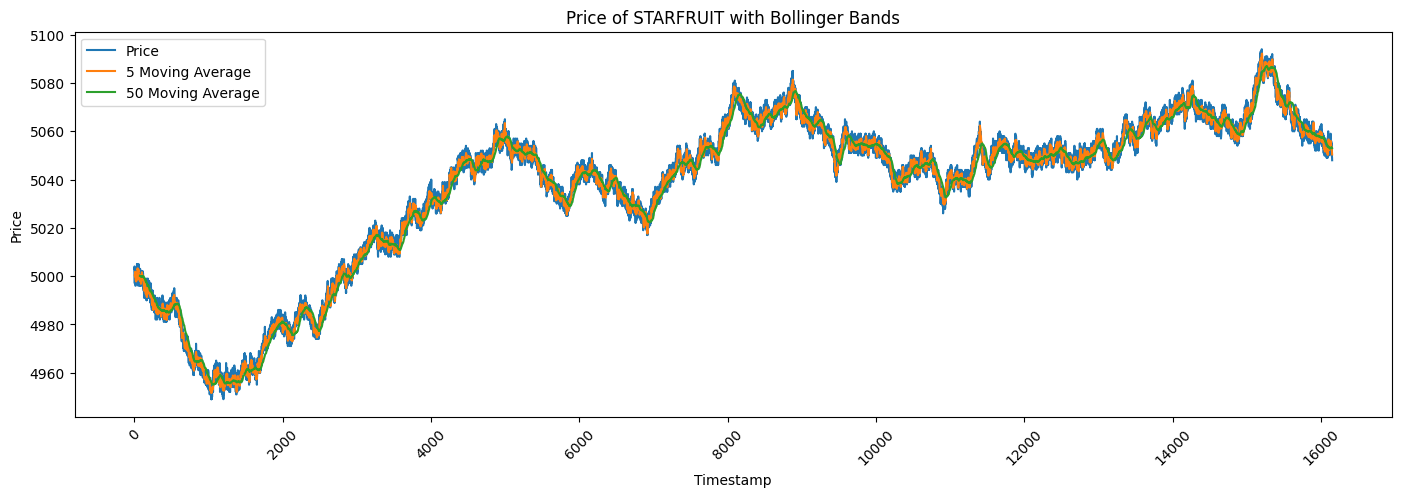

In [68]:
window = 5 # Number of periods for the moving average and standard deviation
starfruit_data.loc[:, "MA"] = STARFRUIT_price['price'].rolling(window=window).mean()
starfruit_data.loc[:, "std"] = STARFRUIT_price['price'].rolling(window=window).std()
starfruit_data.loc[:, "upper_band"] = STARFRUIT_price['price'] + 1.5 * STARFRUIT_price['price']
starfruit_data.loc[:, "lower_band"] = STARFRUIT_price['price'] - 1.5 * STARFRUIT_price['price']
window = 50 # Number of periods for the moving average and standard deviation
starfruit_data.loc[:, "50MA"] = STARFRUIT_price['price'].rolling(window=window).mean().values

# Plot the price with Bollinger Bands
plt.figure(figsize=(17, 5))
plt.plot(starfruit_data["price"], label="Price")
plt.plot(starfruit_data["MA"], label="5 Moving Average")
plt.plot(starfruit_data["50MA"], label="50 Moving Average")
#plt.plot(starfruit_data["upper_band"], label="Upper Bollinger Band")
#plt.plot(starfruit_data["lower_band"], label="Lower Bollinger Band")
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.title("Price of STARFRUIT with Bollinger Bands")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Market efficiency Test for STARFRUIT

In [48]:
def compute_hurst_exponent(time_series):
    """Compute the Hurst exponent of a time series."""
    num_lags = range(2, 10)
    tau = [np.sqrt(np.std(np.subtract(time_series[lag:], time_series[:-lag]))) for lag in num_lags]
    poly = np.polyfit(np.log(num_lags), np.log(tau), 1)
    return poly[0]*2.0

def test_market_efficiency(df):
    """Test the market efficiency of a DataFrame df."""
    assert isinstance(df, pd.DataFrame), "Input should be a pandas DataFrame"
    
    hurst_exponent = compute_hurst_exponent(df.values)
    print(f"Hurst exponent: {hurst_exponent}")
    
    if hurst_exponent < 0.5:
        print("The market appears to be efficient.")
    else:
        print("The market appears to be inefficient.")

In [49]:
STARFRUIT_returns = np.log(STARFRUIT_price['price'] / STARFRUIT_price['price'].shift(1)).dropna()

In [50]:
data = pd.DataFrame({'Returns': STARFRUIT_returns, 'Time': starfruit_data["timestamp"]})
test_market_efficiency(data.dropna())
# convert STARFRUIT_returns to DataFrame
STARFRUIT_returns_DataFrame = pd.DataFrame({'timestamp': STARFRUIT_price["timestamp"], 'Returns': STARFRUIT_returns})
print(STARFRUIT_returns_DataFrame)

Hurst exponent: 0.8375395616117585
The market appears to be inefficient.
       timestamp   Returns
1              0       NaN
3            100  0.000200
4            900 -0.000600
5           1000 -0.000800
6           1100  0.000000
...          ...       ...
16143    2998000  0.000000
16144    2998200  0.000990
16145    2998300 -0.000990
16148    2999000 -0.000198
16149    2999100 -0.000198

[8915 rows x 2 columns]


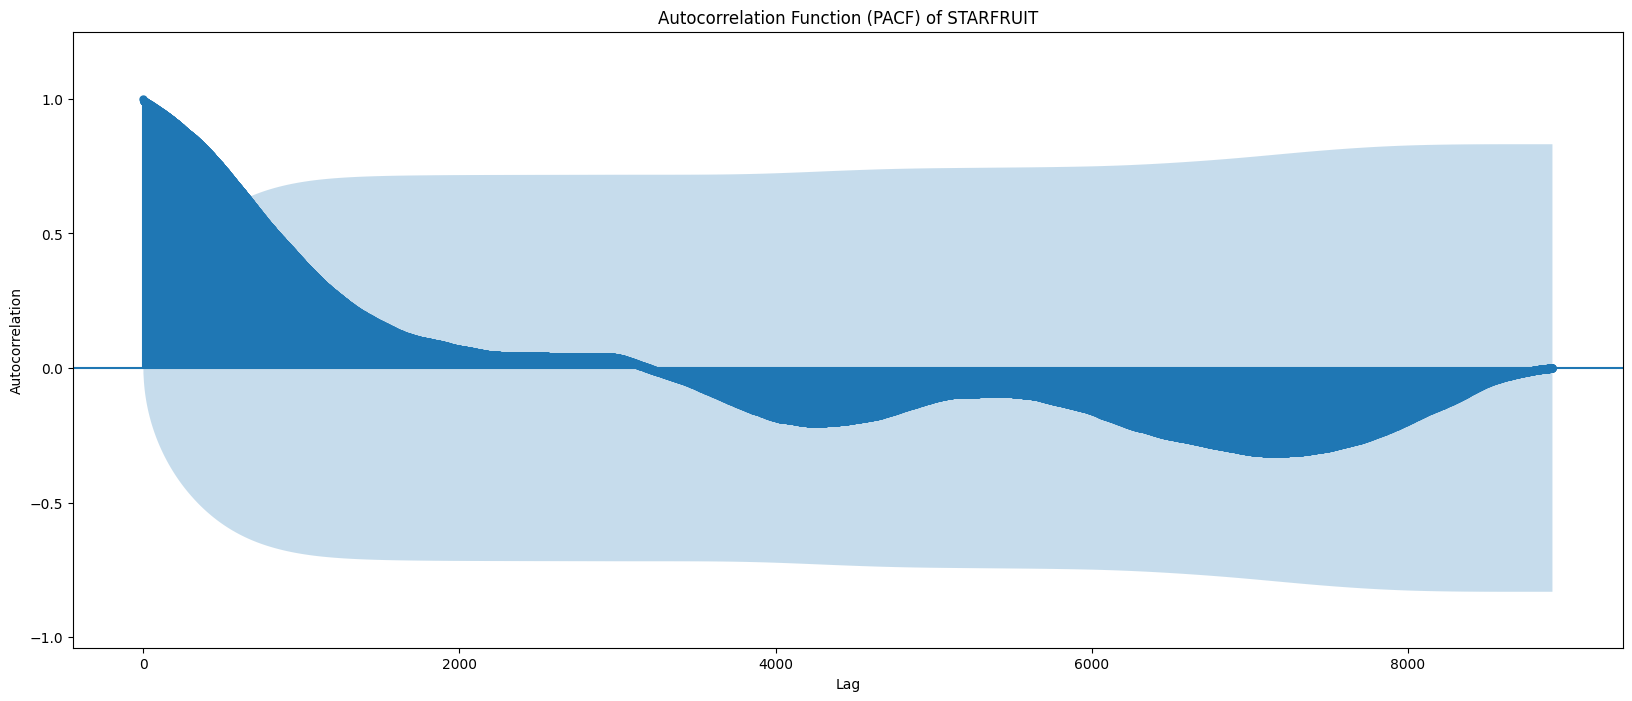

In [51]:
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(20, 8))
plt_pacf = plot_acf(STARFRUIT_price['price'], ax=ax, lags=np.arange(len(STARFRUIT_price['price'])), auto_ylims=True)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function (PACF) of STARFRUIT")
plt.show()

Log return of AMETHYSYS

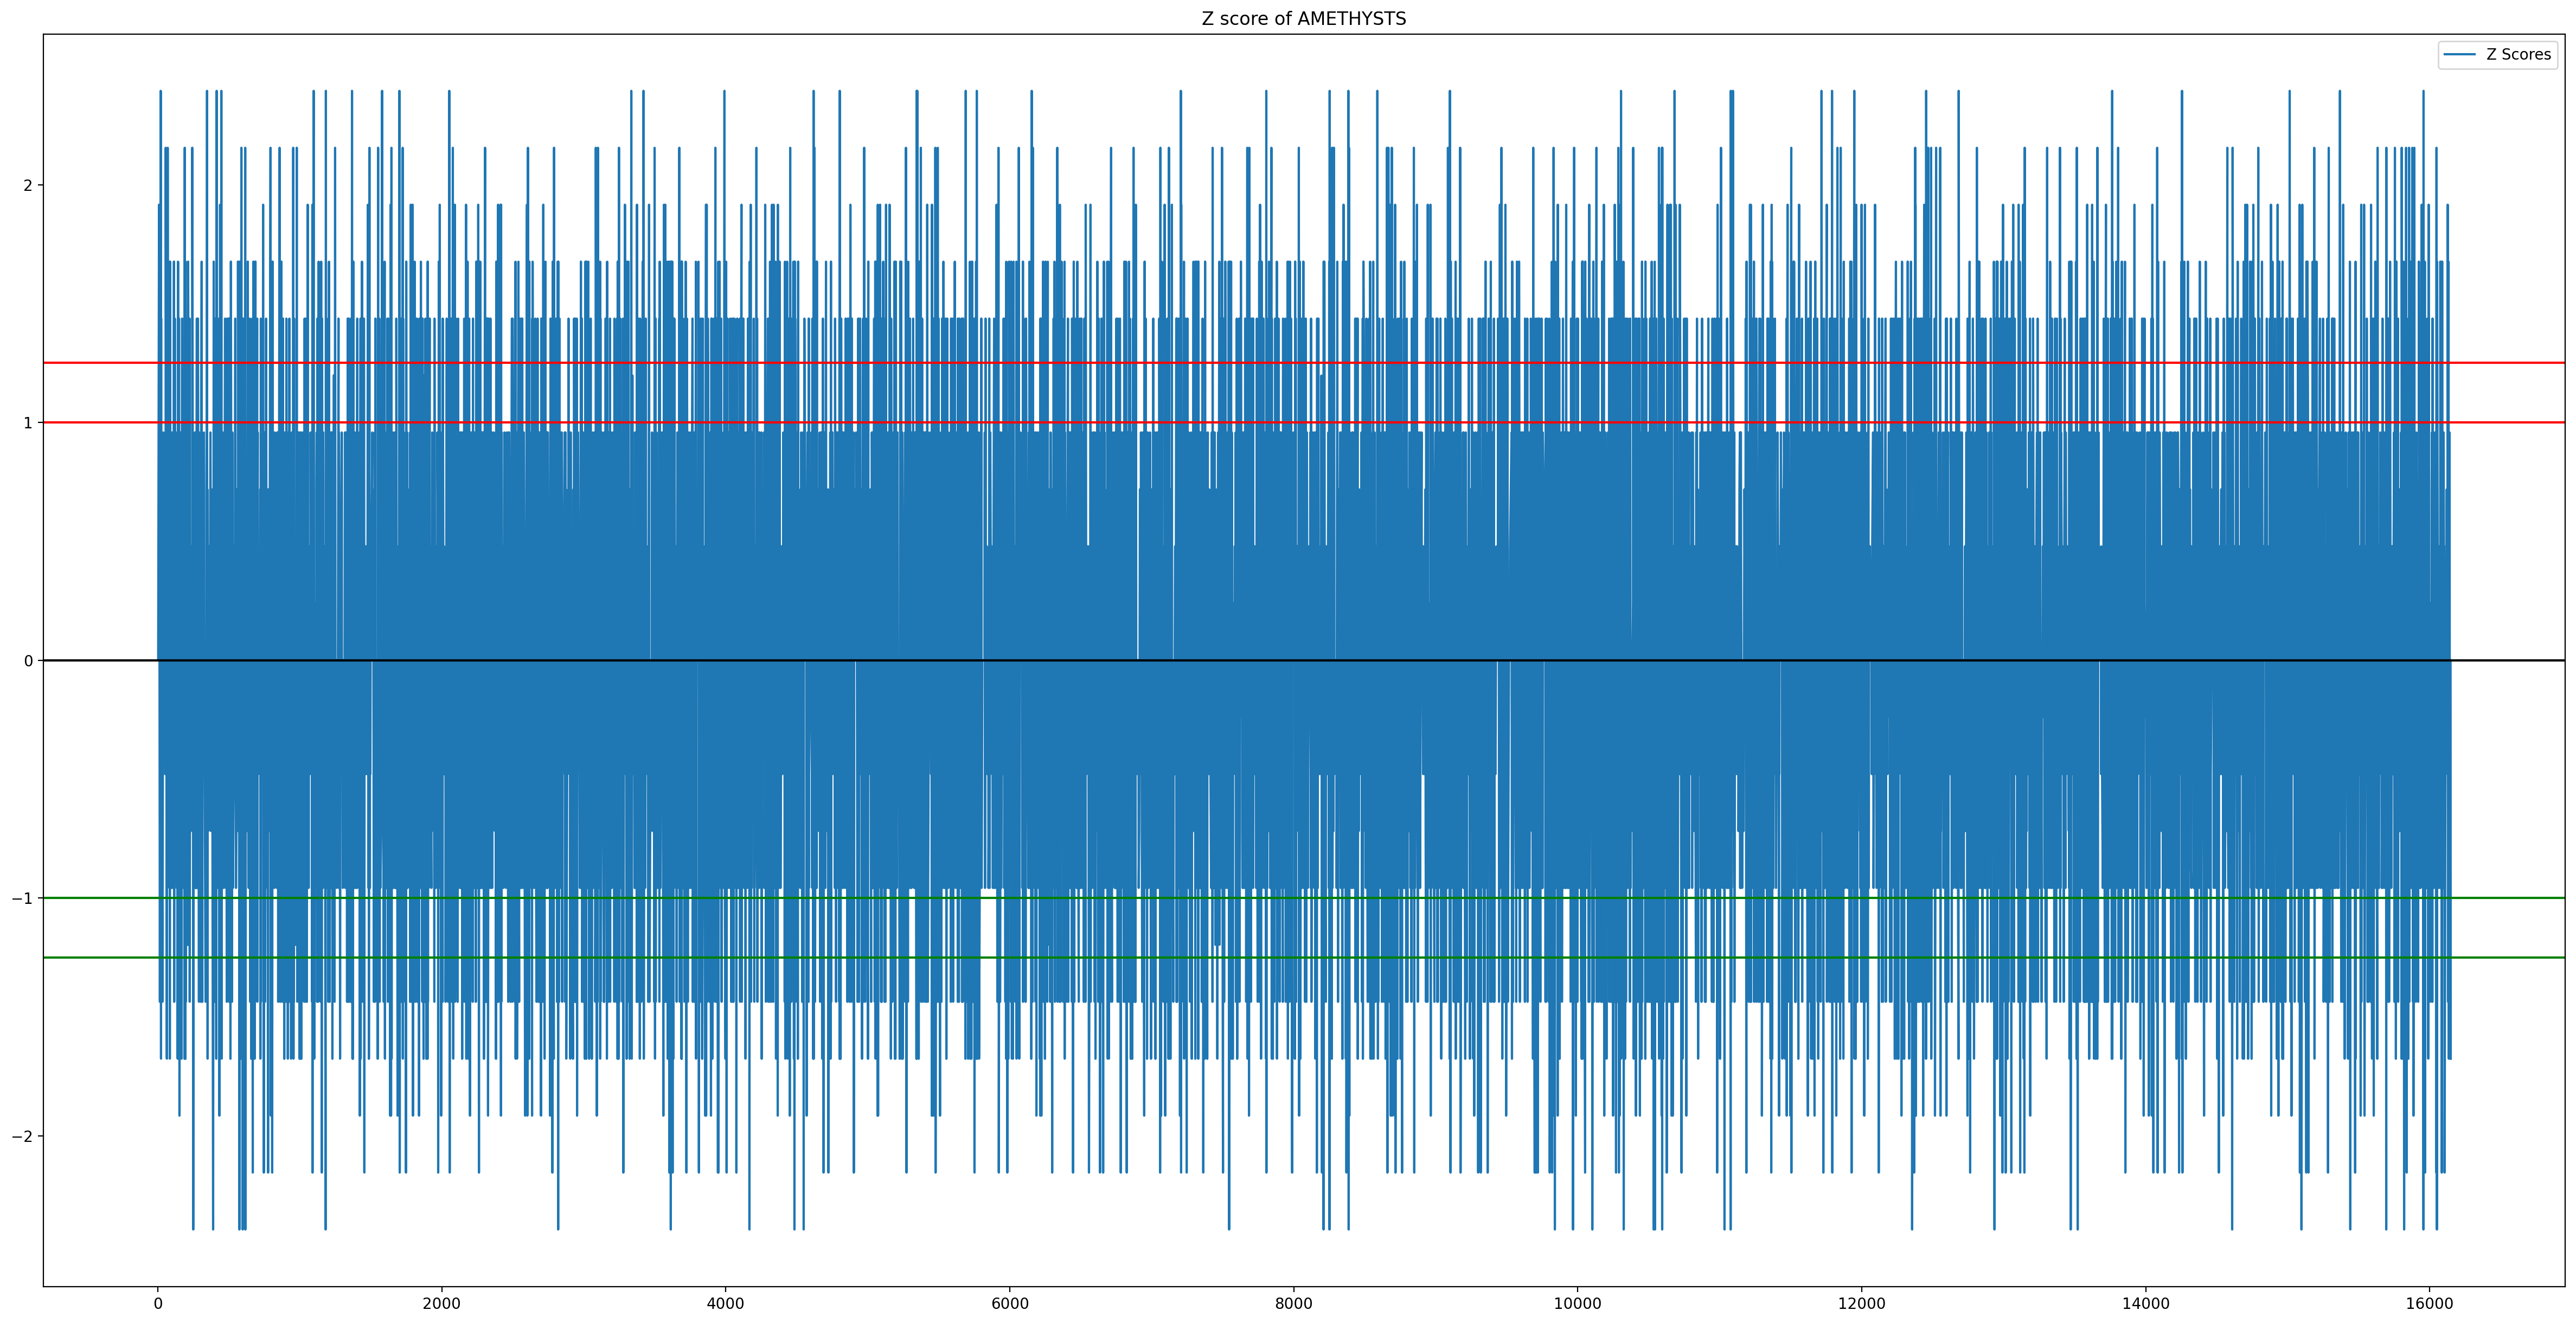

       timestamp  Returns
0              0      NaN
2              0   0.0000
8           1500   0.0008
14          2500  -0.0006
16          3200  -0.0002
...          ...      ...
16139    2997100   0.0004
16140    2997200   0.0000
16142    2997900   0.0000
16146    2998300   0.0000
16147    2999000  -0.0007

[7235 rows x 2 columns]


In [52]:
plt.figure(figsize=(30, 15), dpi=200)
# Calculate the Zscores of each row.
AMETHYSTS_return = np.log(AMETHYSTS_price['price'] / AMETHYSTS_price['price'].shift(1)).dropna()
AMETHYSTS_returns_DataFrame = pd.DataFrame({'timestamp': AMETHYSTS_price["timestamp"], 'Returns': AMETHYSTS_return})
df_zscore =  (AMETHYSTS_return - AMETHYSTS_return.mean()) / AMETHYSTS_return.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of AMETHYSTS')
plt.show()
print(AMETHYSTS_returns_DataFrame)

In [73]:
AMETHYSTS_price.loc[:, "z_score"] = (AMETHYSTS_price["price"] - AMETHYSTS_price["price"].mean()) / AMETHYSTS_price["price"].std()
print(AMETHYSTS_price["z_score"].iloc[5], AMETHYSTS_price["price"].iloc[5])

-1.5764251070846305 9995.0


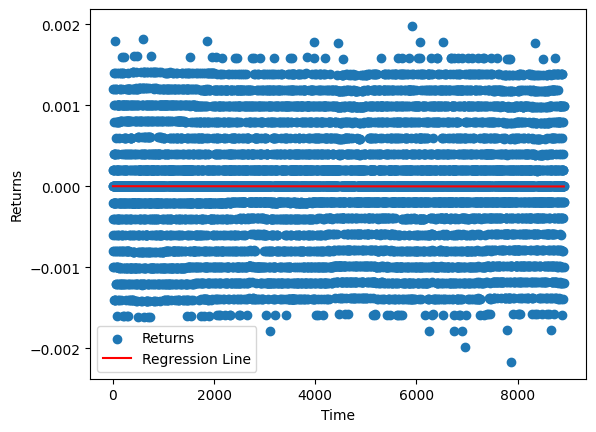

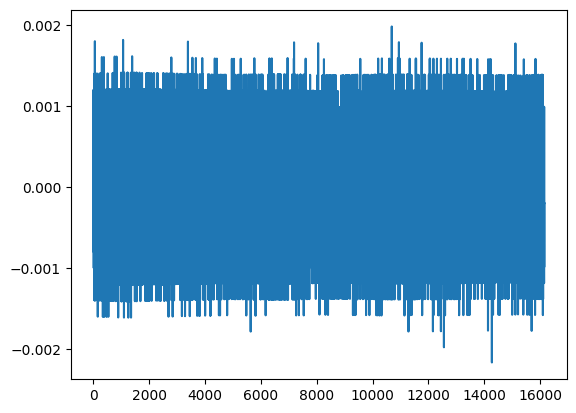

In [54]:
from sklearn.linear_model import LinearRegression
df_regression = pd.DataFrame({'Returns': STARFRUIT_returns, 'Time': range(len(STARFRUIT_returns))})
model = LinearRegression()
model.fit(df_regression[['Time']], df_regression['Returns'])
drift = model.coef_[0]
plt.scatter(df_regression['Time'], df_regression['Returns'], label='Returns')
plt.plot(df_regression['Time'], model.predict(df_regression[['Time']]), color='red', label='Regression Line')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.show()
plt.plot(STARFRUIT_returns)

Simple Backtesting

EMA

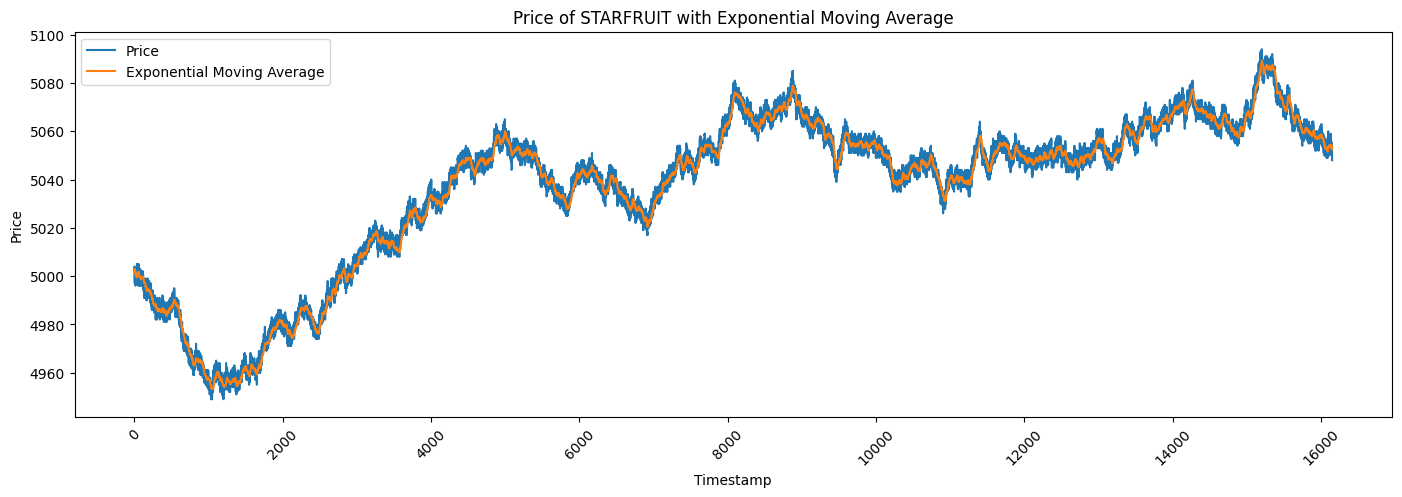

In [67]:
window = 20
alpha = 2 / (window + 1)  # EMA smoothing factor

starfruit_data.loc[:, "EMA"] = STARFRUIT_price["price"].ewm(alpha=alpha, adjust=False).mean().values

# Plot the price with EMA
plt.figure(figsize=(17, 5))
plt.plot(starfruit_data["price"], label="Price")
plt.plot(starfruit_data["EMA"], label="Exponential Moving Average")
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.title("Price of STARFRUIT with Exponential Moving Average")
plt.xticks(rotation=45)
plt.legend()
plt.show()

TMA

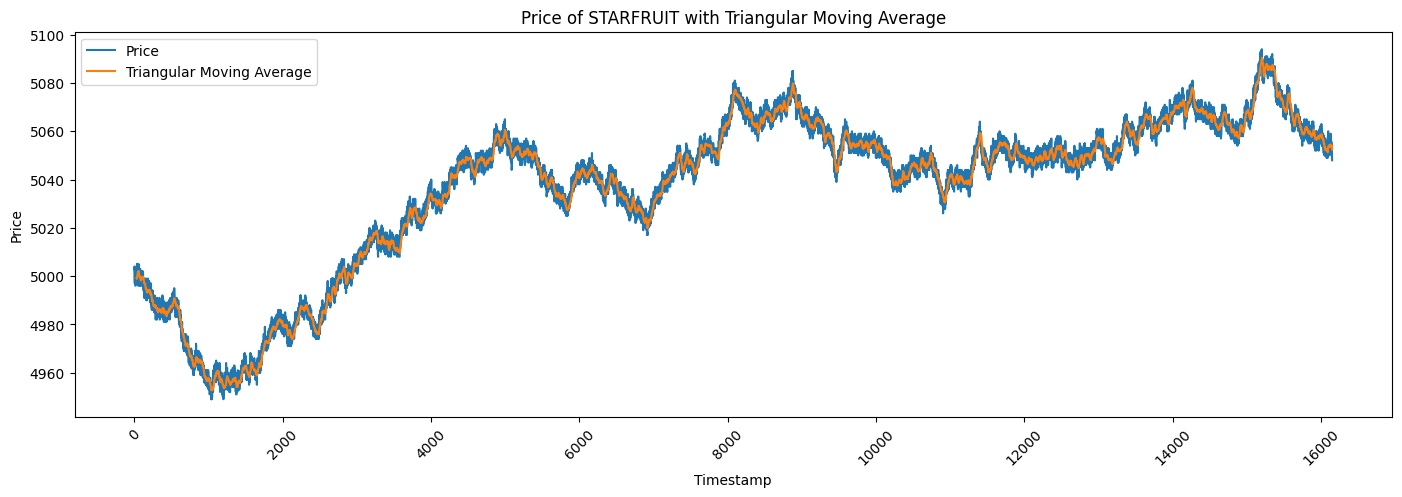

In [69]:
window = 20

weights = np.array(range(1, window + 1))
weights_sum = np.sum(weights)
starfruit_data.loc[:, "TMA"] = STARFRUIT_price["price"].rolling(window=window).apply(lambda x: np.dot(x, weights) / weights_sum, raw=True).values

# Plot the price with TMA
plt.figure(figsize=(17, 5))
plt.plot(starfruit_data["price"], label="Price")
plt.plot(starfruit_data["TMA"], label="Triangular Moving Average")
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.title("Price of STARFRUIT with Triangular Moving Average")
plt.xticks(rotation=45)
plt.legend()
plt.show()

ADF test for log return of STARFRUIT

In [57]:
STARFRUIT_log_return_ADF = adfuller(STARFRUIT_returns, autolag='AIC')
printTestData(STARFRUIT_log_return_ADF)
#-75.21873559751832 ADF stat of AMETHYSTS

ADF Statistic: -44.07716909173265
n_lags: 0.0
p-value: 0.0
Critial Values:
   1%, -3.4310845520505455
Critial Values:
   5%, -2.8618646239155696
Critial Values:
   10%, -2.5669427923010404




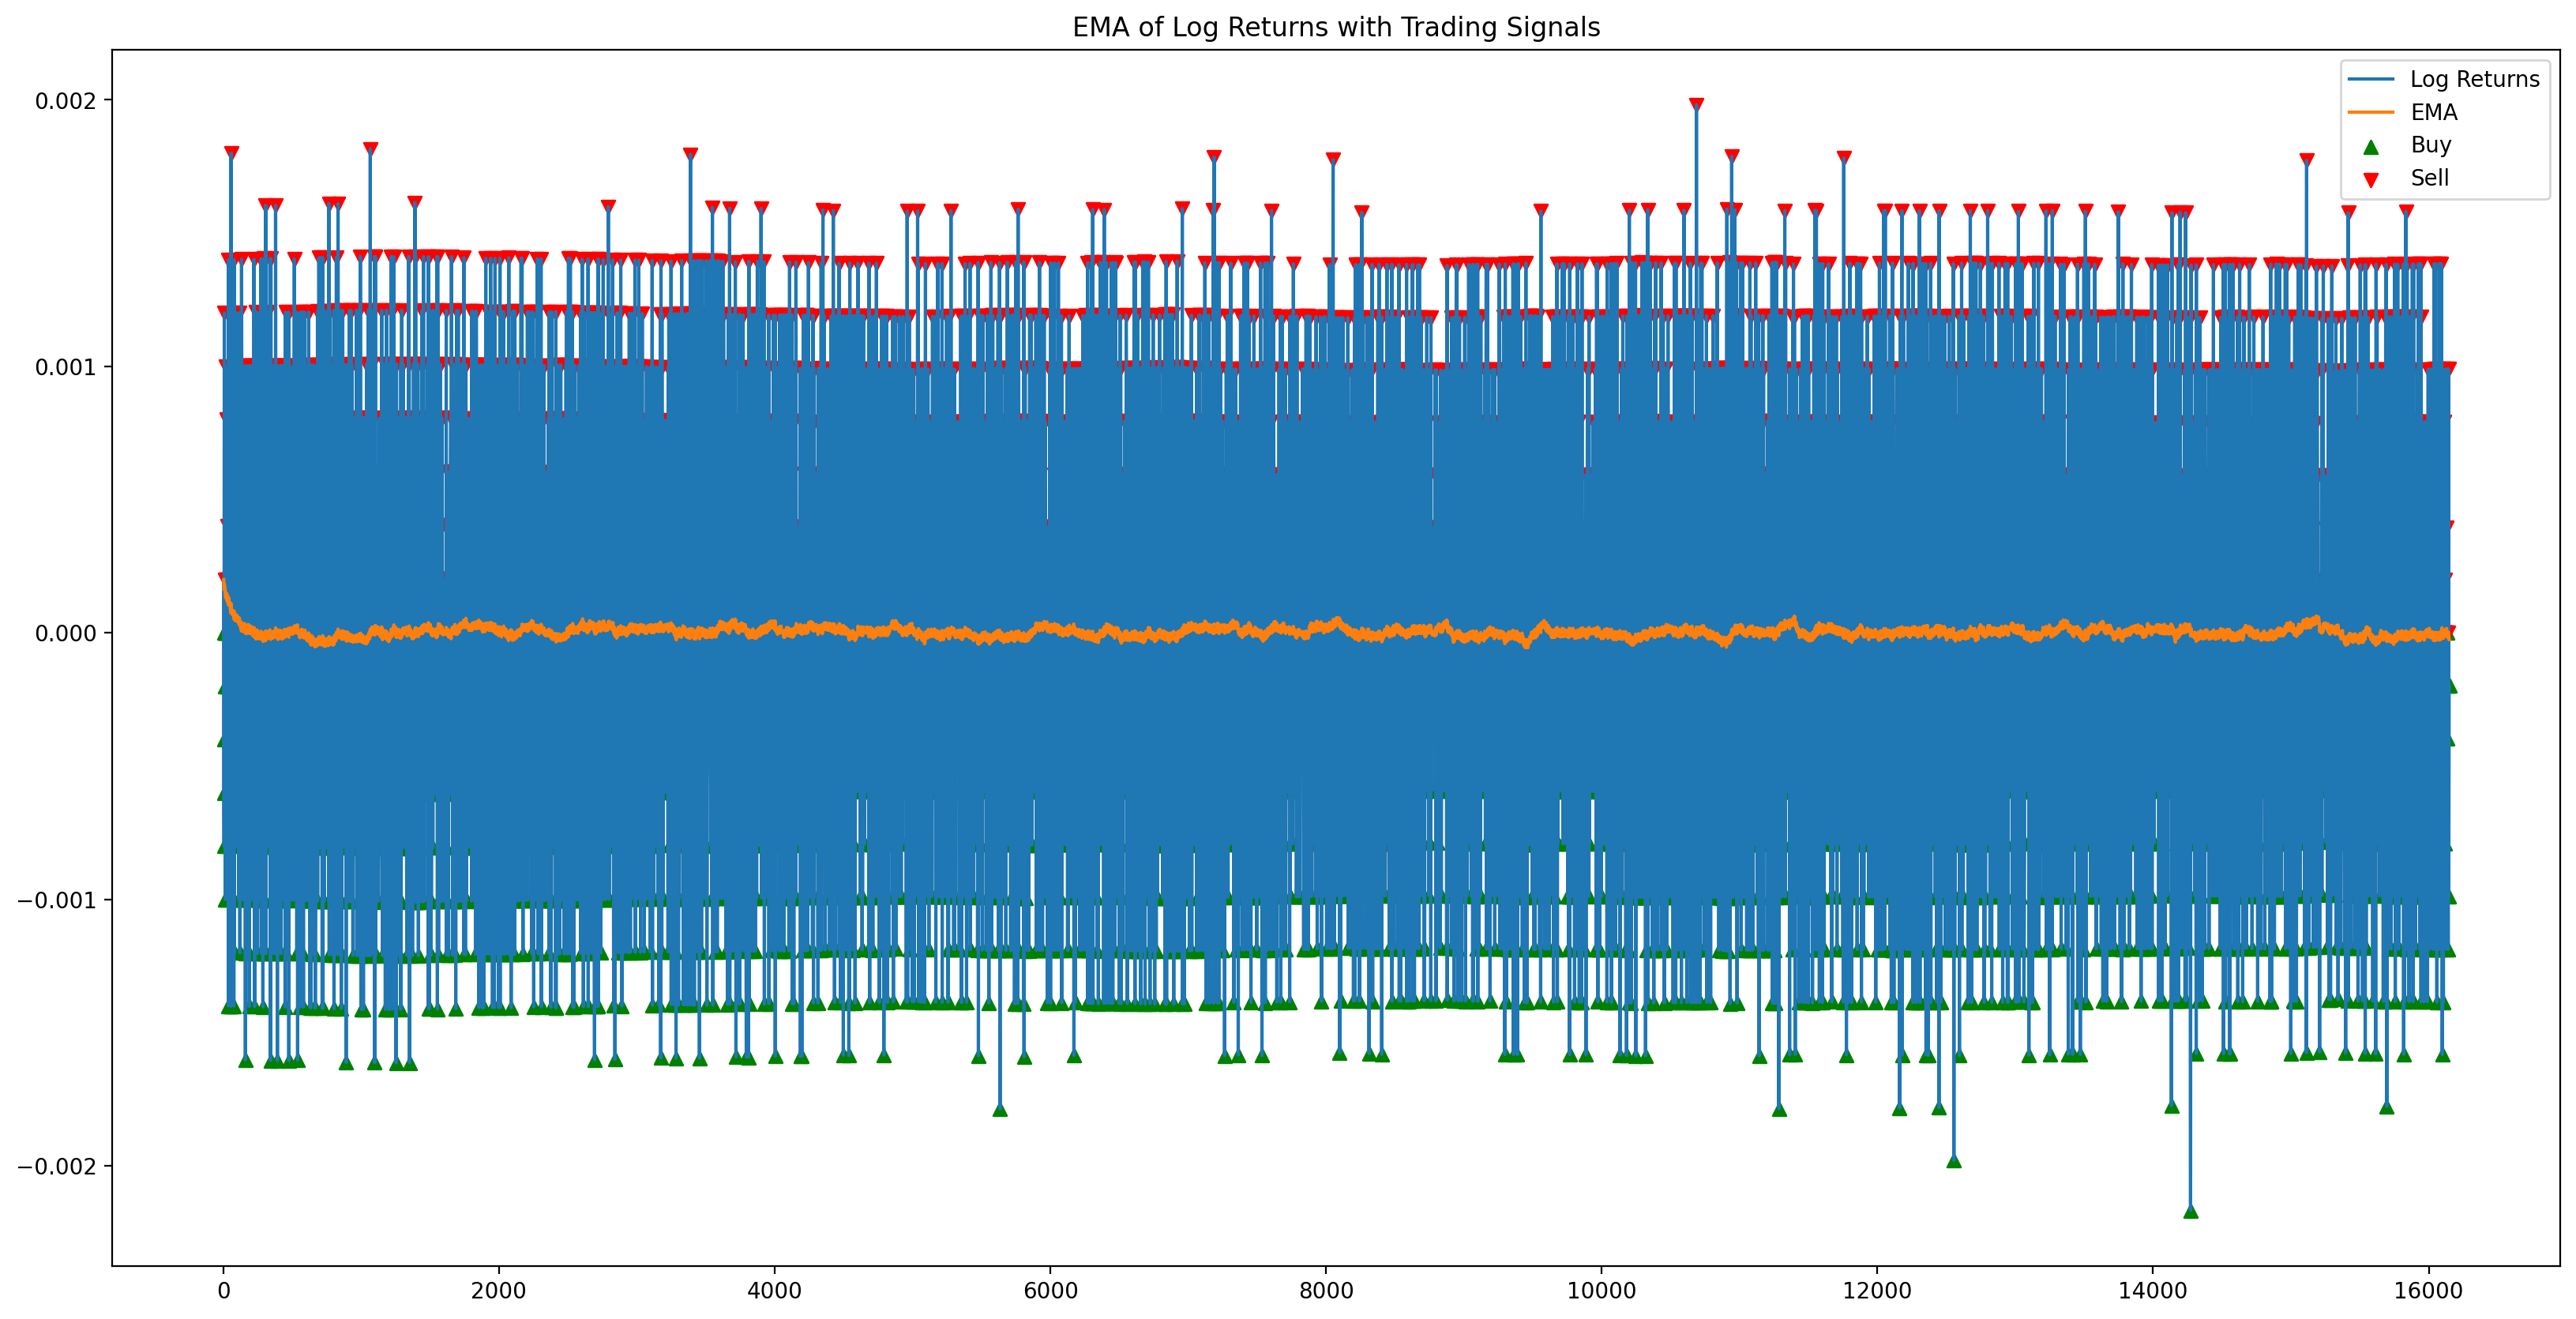

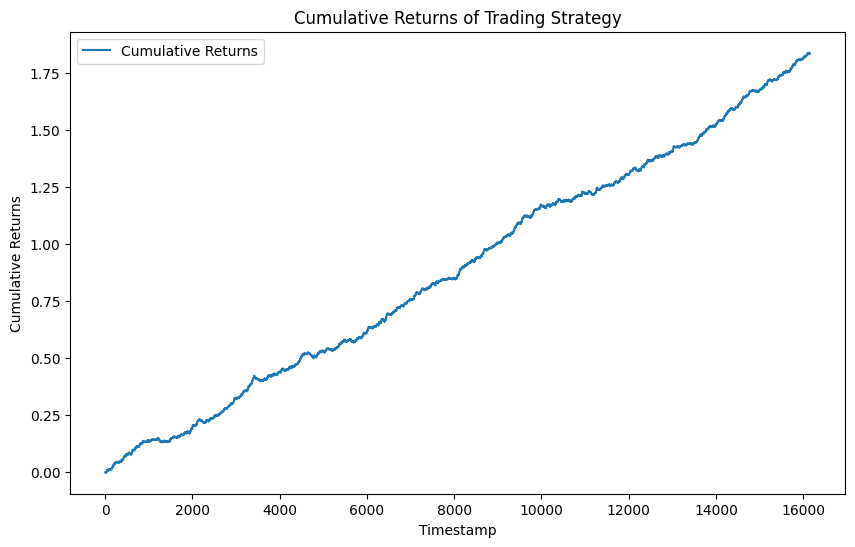

In [58]:
window_size = 100  # Specify the window size for EMA calculation
ema = STARFRUIT_returns.ewm(span=window_size, adjust=False).mean()
signal = pd.Series(0, index= STARFRUIT_returns.index)  # Initialize signal series with zeros
signal[STARFRUIT_returns > ema] = -1  
signal[STARFRUIT_returns < ema] = 1  
# Backtest the trading signals
positions = signal.diff()  # Calculate positions based on signal changes
returns = STARFRUIT_returns * positions.shift()  # Calculate returns based on position changes
cumulative_returns = returns.cumsum()  # Calculate cumulative returns

# Plot the log returns, EMA, and trading signals
plt.figure(figsize=(20, 10), dpi=200)
plt.plot(STARFRUIT_returns, label='Log Returns')
plt.plot(ema, label='EMA')
plt.scatter(signal[signal == 1].index, STARFRUIT_returns[signal == 1], color='green', marker='^', label='Buy')
plt.scatter(signal[signal == -1].index, STARFRUIT_returns[signal == -1], color='red', marker='v', label='Sell')
plt.title('EMA of Log Returns with Trading Signals')
plt.legend()
plt.show()

# Plot the cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='Cumulative Returns')
plt.title('Cumulative Returns of Trading Strategy')
plt.xlabel('Timestamp')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

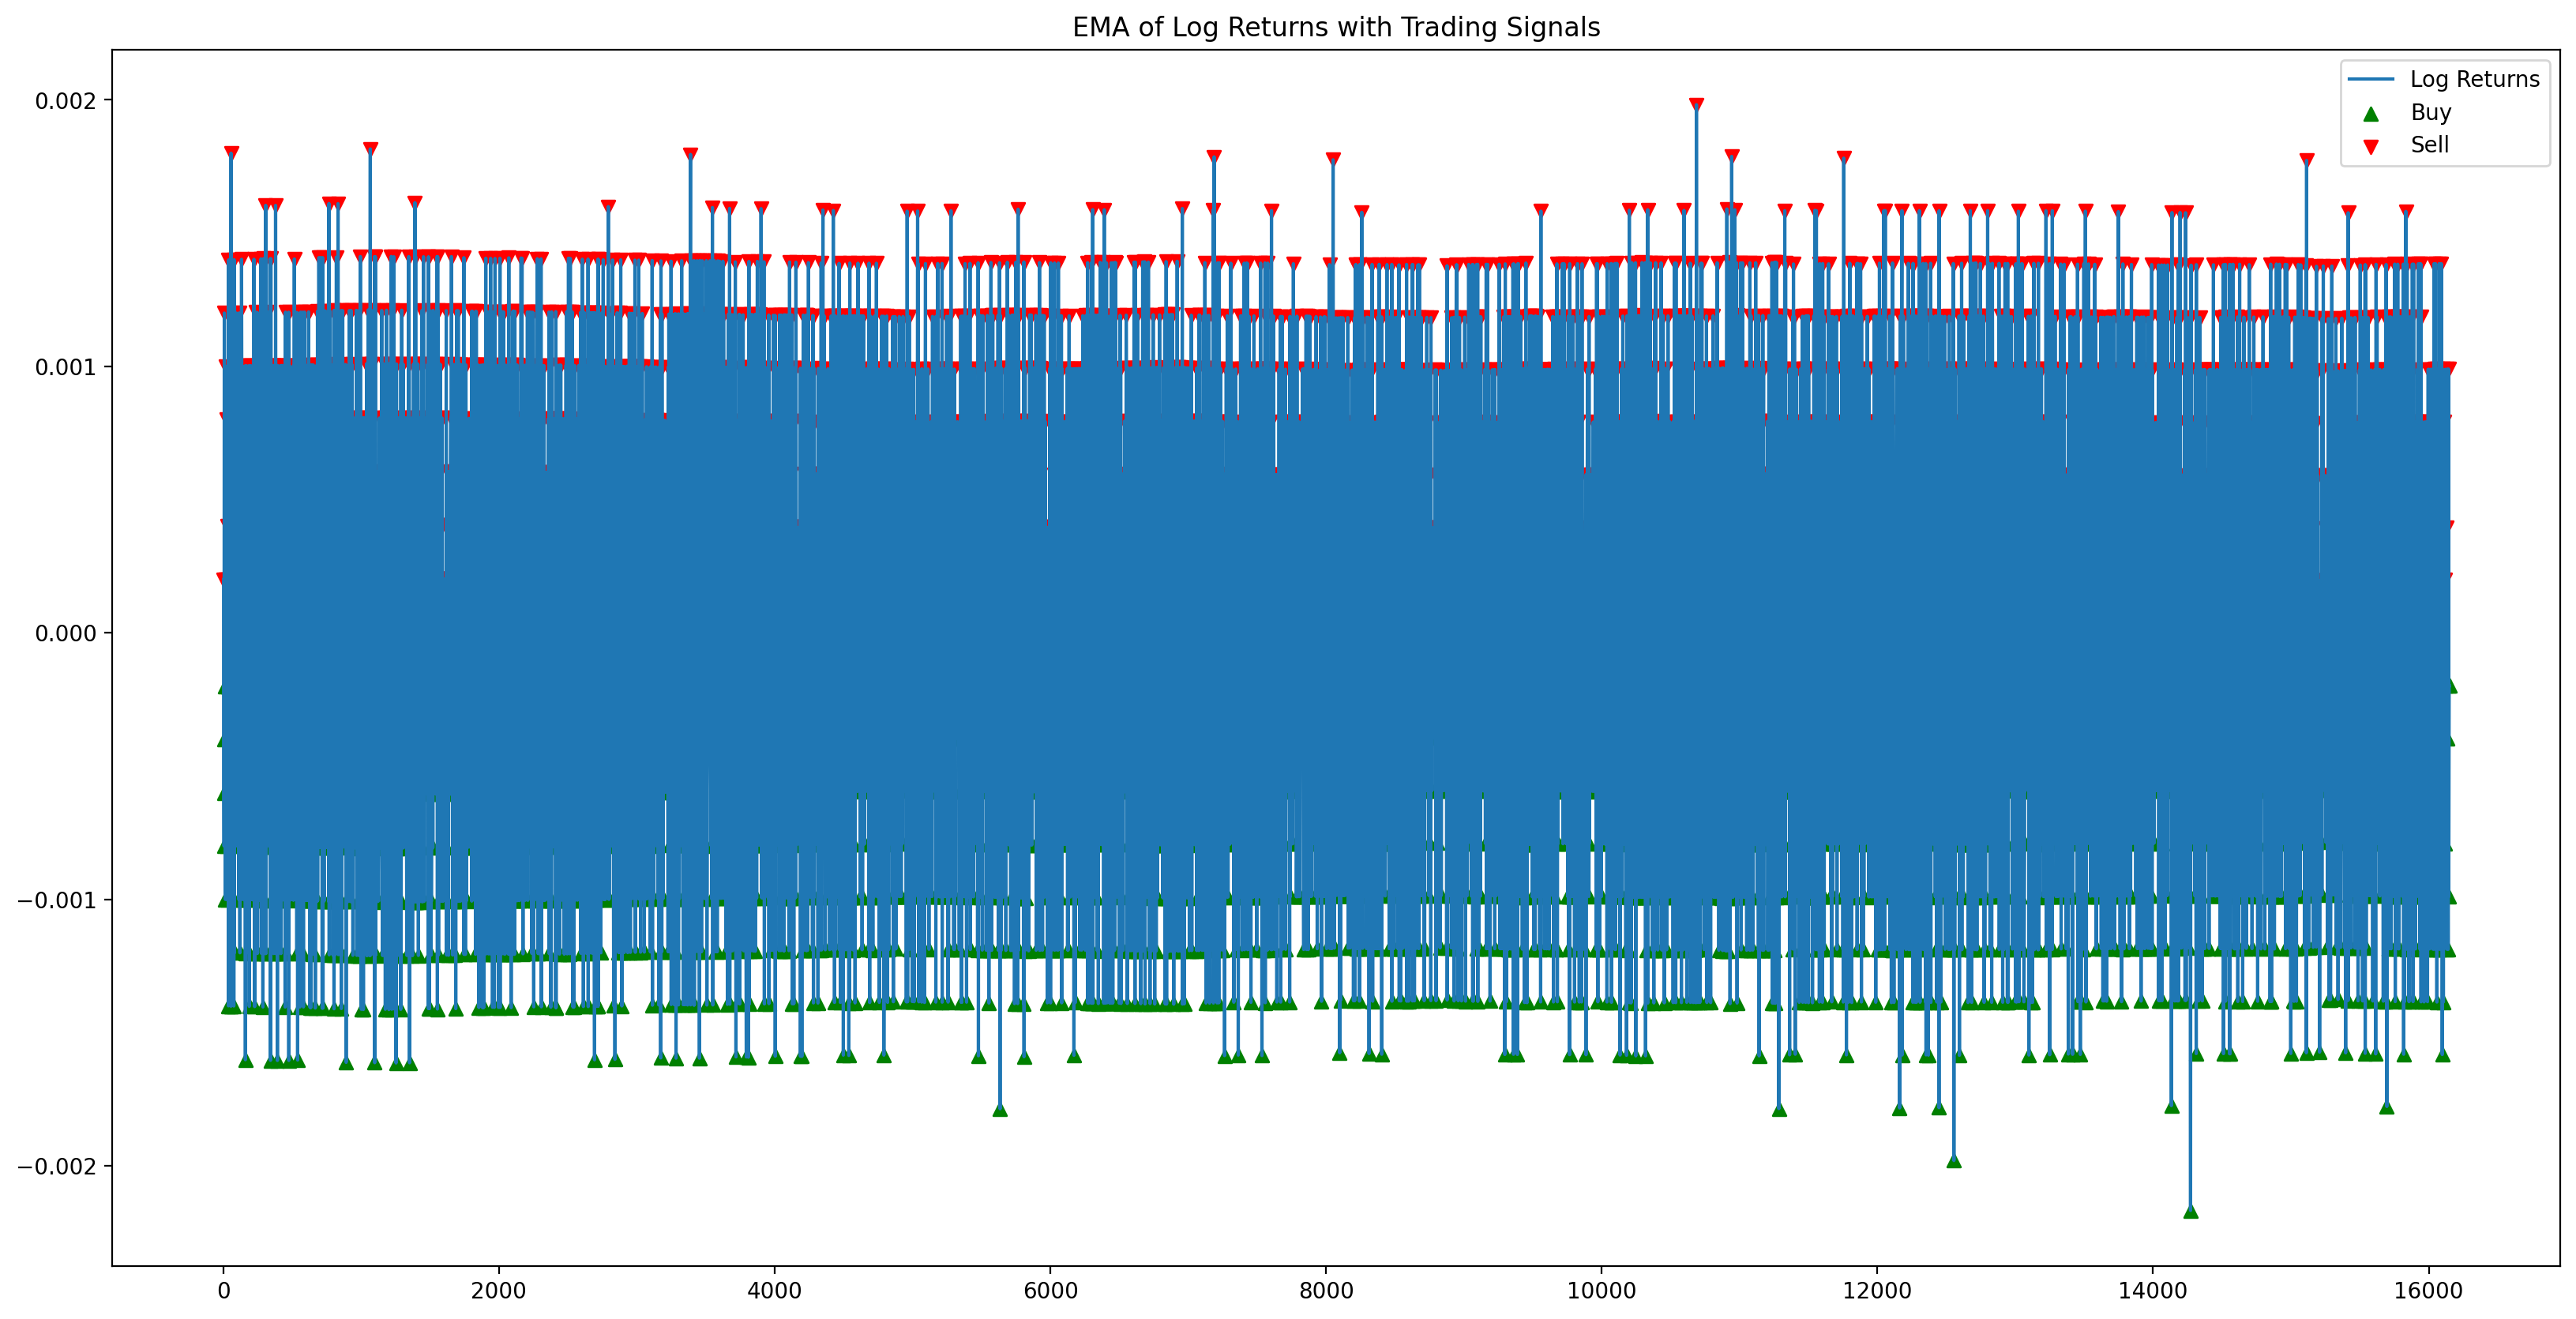

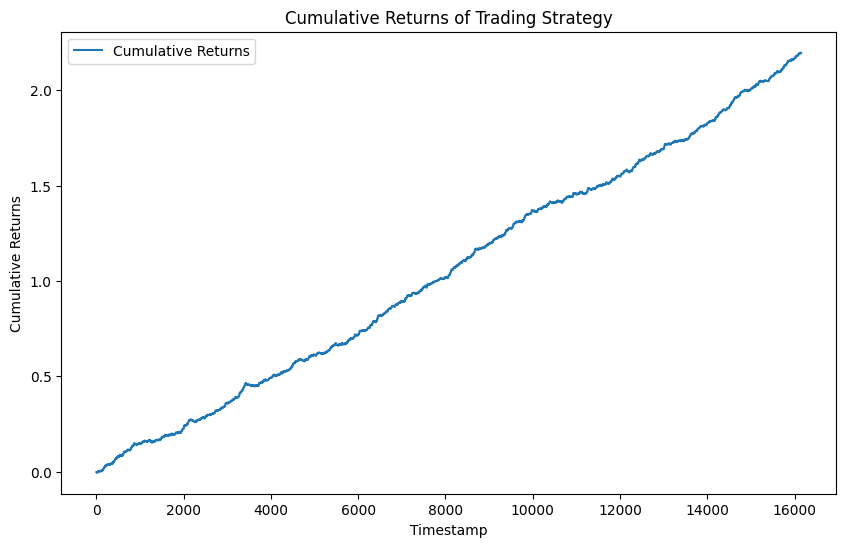

3             NaN
4             NaN
5       -0.001600
6       -0.001600
7       -0.002800
           ...   
16143    2.194679
16144    2.193689
16145    2.194679
16148    2.194283
16149    2.194283
Length: 8914, dtype: float64


In [59]:
signal = pd.Series(0, index= STARFRUIT_returns.index)  # Initialize signal series with zeros
signal[STARFRUIT_returns > 0.0001] = -1  
signal[STARFRUIT_returns < -0.0001] = 1  
# Backtest the trading signals
positions = signal.diff()  # Calculate positions based on signal changes
returns = STARFRUIT_returns * positions.shift()  # Calculate returns based on position changes
cumulative_returns = returns.cumsum()  # Calculate cumulative returns

# Plot the log returns, EMA, and trading signals
plt.figure(figsize=(20, 10), dpi=200)
plt.plot(STARFRUIT_returns, label='Log Returns')
#plt.plot(ema, label='EMA')
plt.scatter(signal[signal == 1].index, STARFRUIT_returns[signal == 1], color='green', marker='^', label='Buy')
plt.scatter(signal[signal == -1].index, STARFRUIT_returns[signal == -1], color='red', marker='v', label='Sell')
plt.title('EMA of Log Returns with Trading Signals')
plt.legend()
plt.show()

# Plot the cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='Cumulative Returns')
plt.title('Cumulative Returns of Trading Strategy')
plt.xlabel('Timestamp')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()
print(cumulative_returns)

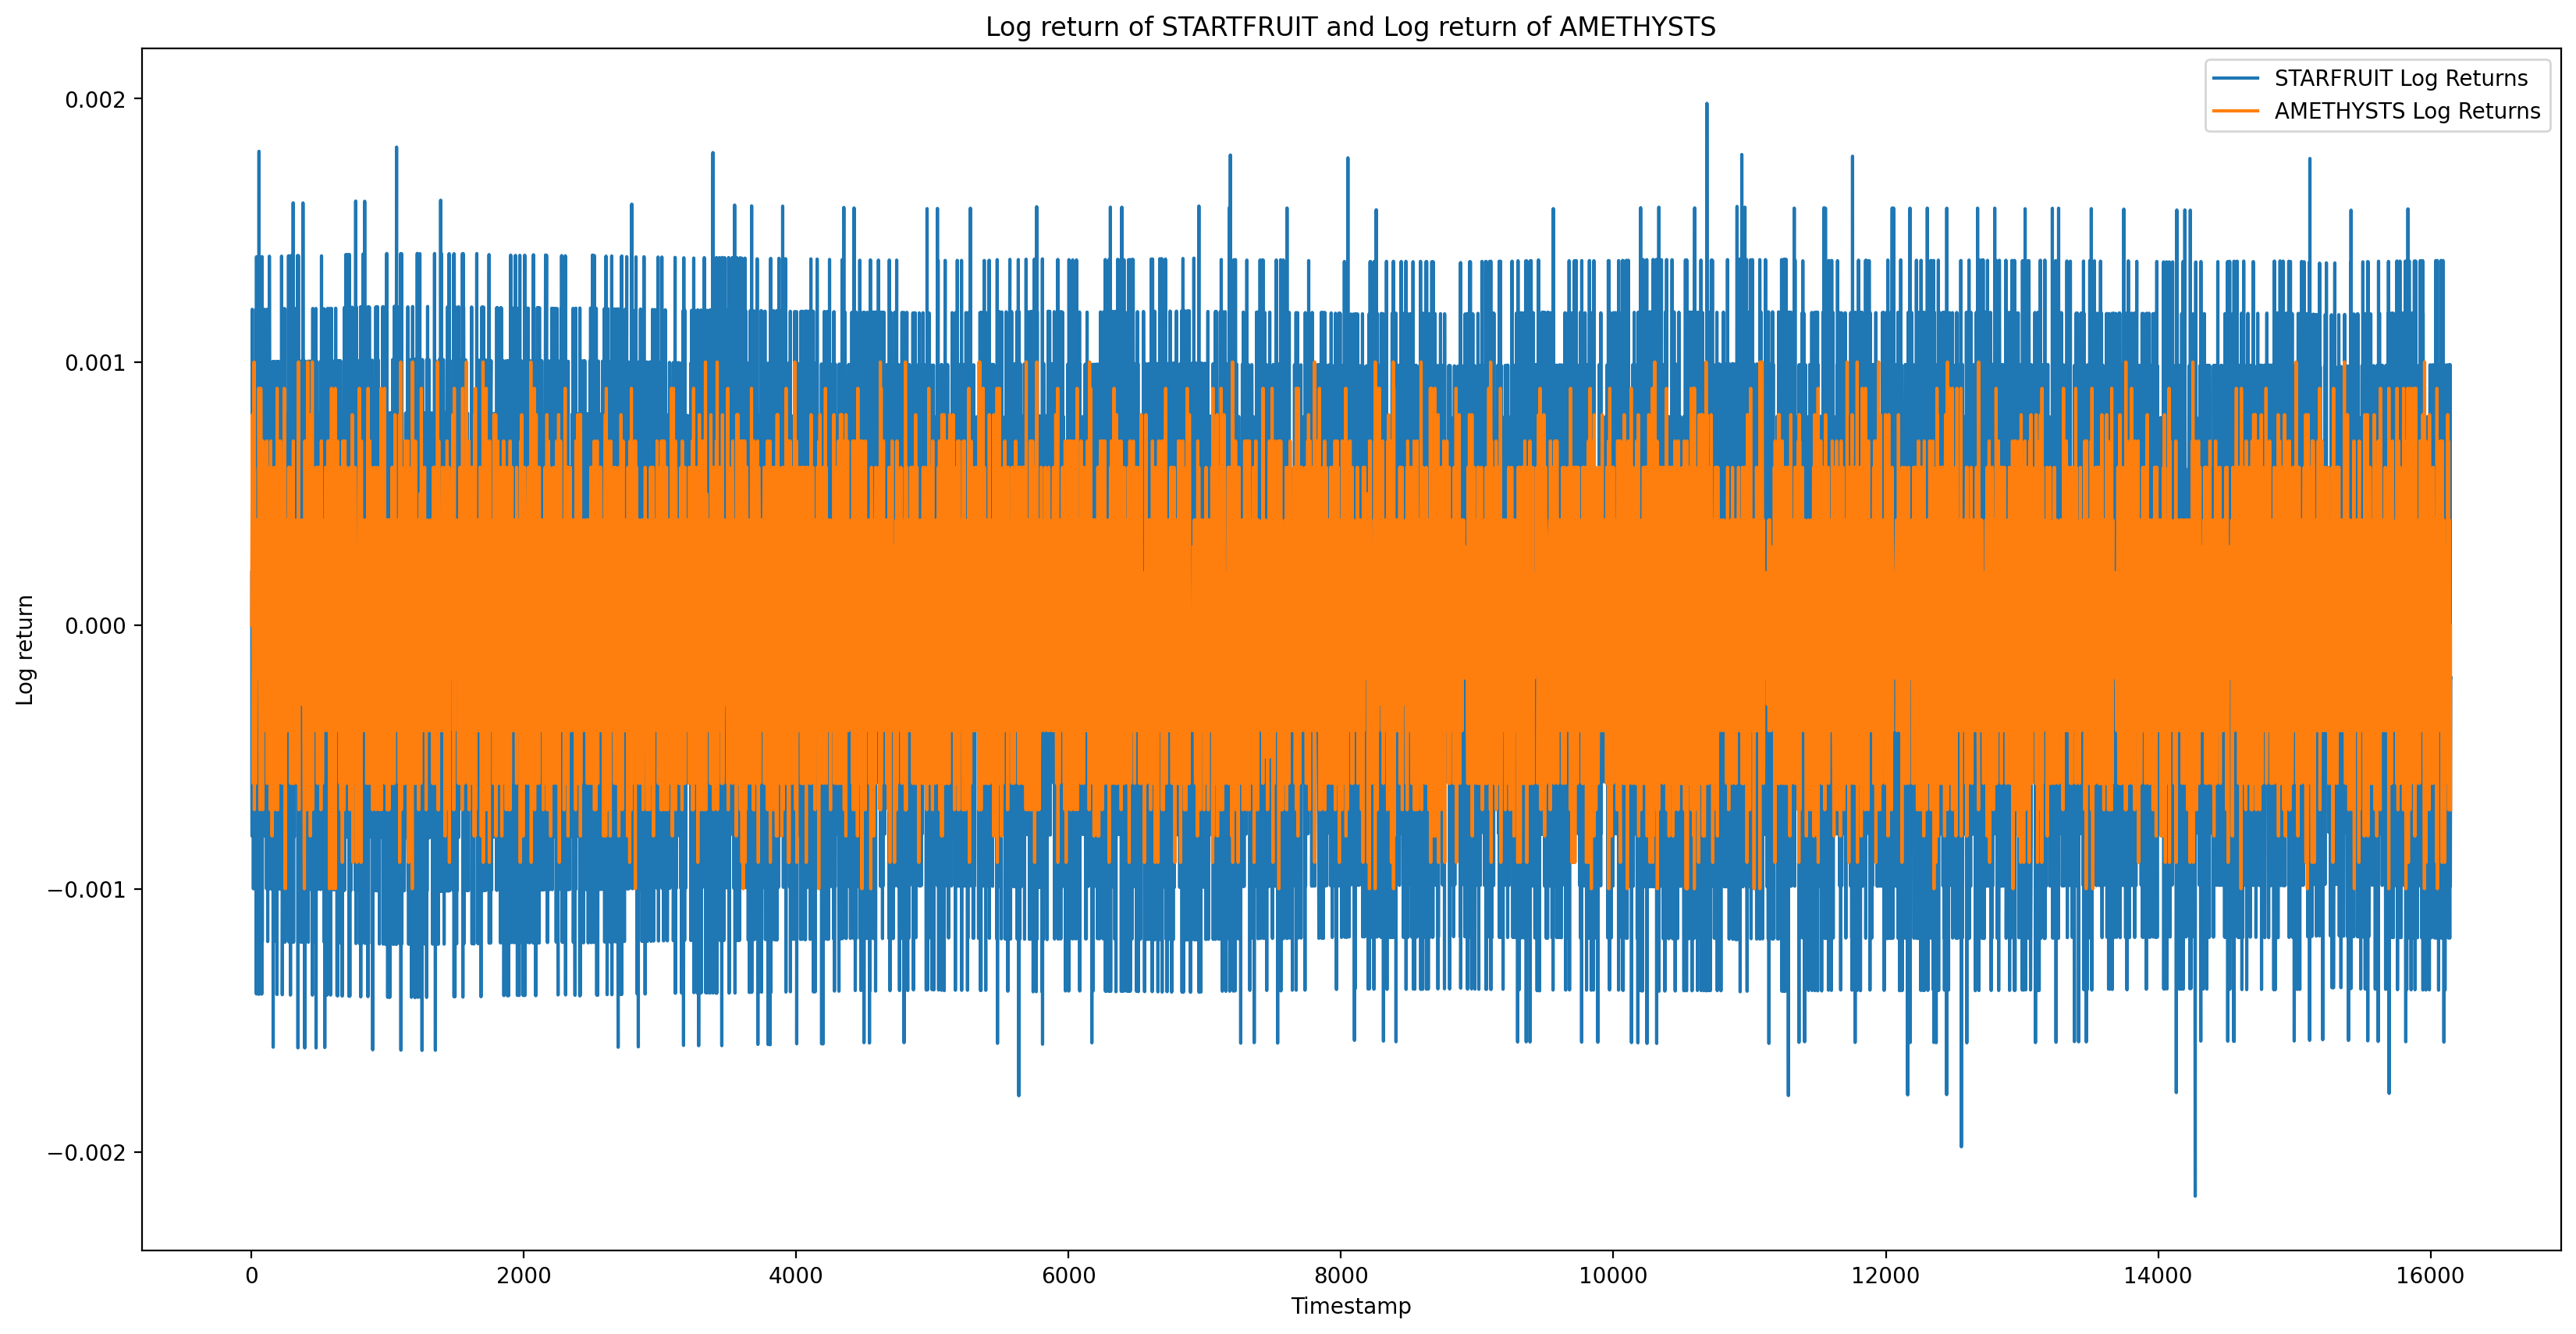

In [60]:
plt.figure(figsize=(20, 10), dpi=200)
plt.plot(STARFRUIT_returns, label ='STARFRUIT Log Returns')
plt.plot(AMETHYSTS_return, label = 'AMETHYSTS Log Returns')
plt.title('Log return of STARTFRUIT and Log return of AMETHYSTS')
plt.xlabel('Timestamp')
plt.ylabel('Log return')
plt.legend()
plt.show()

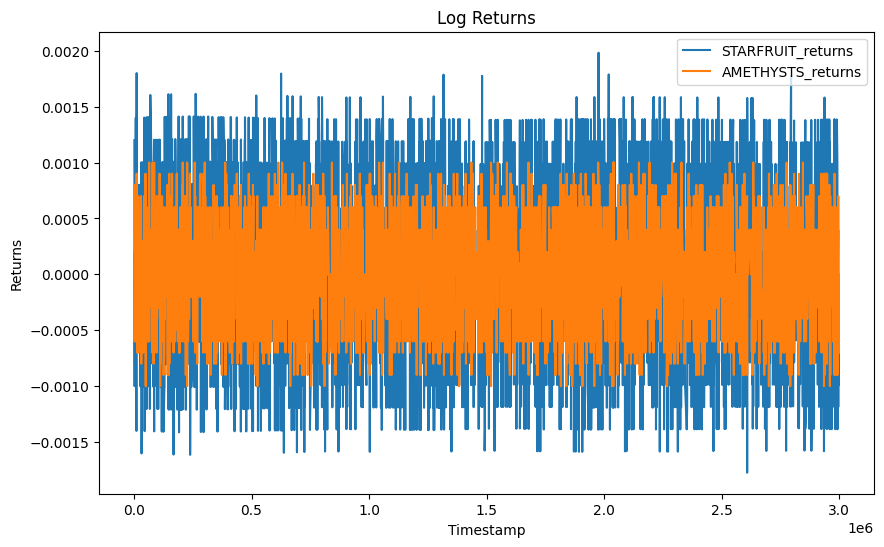

In [61]:
STARFRUIT_returns_DataFrame = STARFRUIT_returns_DataFrame.dropna()
AMETHYSTS_returns_DataFrame = AMETHYSTS_returns_DataFrame.dropna()

merged_log_data = pd.merge(STARFRUIT_returns_DataFrame, AMETHYSTS_returns_DataFrame, on="timestamp", how="inner")
overlap_length = len(merged_log_data) # price_x = STARFRUIT, price_y = AMETHYSTS 
overlap_start_time = merged_log_data["timestamp"].iloc[0]
overlap_end_time = merged_log_data["timestamp"].iloc[-1]
overlap_timestamps = merged_log_data["timestamp"]

plt.figure(figsize=(10, 6))
plt.plot(merged_log_data['timestamp'], merged_log_data['Returns_x'], label='STARFRUIT_returns')
plt.plot(merged_log_data['timestamp'], merged_log_data['Returns_y'], label='AMETHYSTS_returns')
plt.xlabel('Timestamp')
plt.ylabel('Returns')
plt.title('Log Returns')
plt.legend()
plt.show()



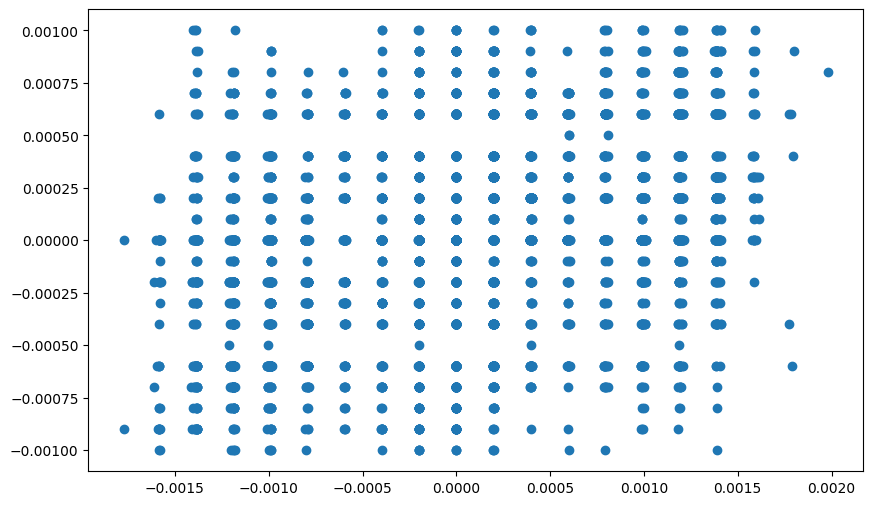

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_log_data['Returns_x'], merged_log_data['Returns_y'])

In [63]:
correlation = merged_log_data['Returns_x'].corr(merged_log_data['Returns_y'])
print("Correlation:", correlation)
score, pvalue, _ = coint(merged_log_data['Returns_x'],merged_log_data['Returns_y'])
print("pvalue: ", pvalue)
print("score: ", score)
print('Critial Values: ')
print("1%: ", _[0])
print("5%: ", _[1])
print("10%: ", _[2])

Correlation: 0.2920782749635815
pvalue:  0.0
score:  -40.4199193754085
Critial Values: 
1%:  -3.8990285258660298
5%:  -3.337573484052552
10%:  -3.045451852248114


In [64]:
correlation = merged_data['price_x'].corr(merged_data['price_y'])
print("Correlation:", correlation)
score, pvalue, _ = coint(merged_data['price_x'],merged_data['price_y'])
print("pvalue: ", pvalue)
print("score: ", score)
print('Critial Values: ')
print("1%: ", _[0])
print("5%: ", _[1])
print("10%: ", _[2])

Correlation: 0.05438337540916393
pvalue:  0.7807085597145087
score:  -1.4476655951457182
Critial Values: 
1%:  -3.8990273028276894
5%:  -3.337572802341279
10%:  -3.045451379158452


ADF Statistic: -43.09768769746536
n_lags: 0.0
p-value: 0.0
Critial Values:
   1%, -3.432431630755232
Critial Values:
   5%, -2.8624597362413495
Critial Values:
   10%, -2.5672595971526198




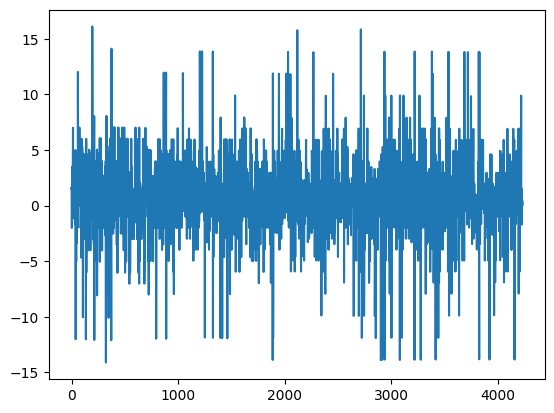

In [65]:
ratio = (merged_log_data['Returns_x']/merged_log_data['Returns_y'])
ratio = ratio.dropna()
ratio = ratio[np.isfinite(ratio)]
plt.plot(ratio)
plt.plot(ratio.mean())
ratio_ADF = adfuller(ratio, autolag='AIC')
printTestData(ratio_ADF)

ADF Statistic: -39.66953965783367
n_lags: 0.0
p-value: 0.0
Critial Values:
   1%, -3.4318961415125915
Critial Values:
   5%, -2.8622232000728345
Critial Values:
   10%, -2.5671336729093484




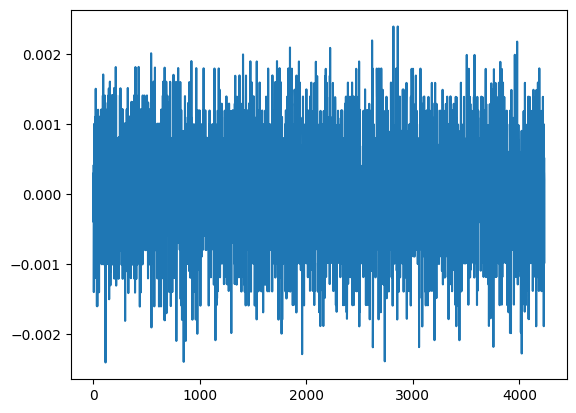

In [66]:
diff = merged_log_data['Returns_x'] - merged_log_data['Returns_y']
plt.plot(diff)
diff_ADF = adfuller(diff, autolag='AIC')
printTestData(diff_ADF)